<a href="https://colab.research.google.com/github/NikPython/beispiel-projekt/blob/main/fatal_force__start.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty.

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [ ]:
%pip install --upgrade plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 58.7 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.24.1
    Uninstalling plotly-5.24.1:
      Successfully uninstalled plotly-5.24.1


## Import Statements

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
from collections import Counter

## Notebook Presentation

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [ ]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames?
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [ ]:
print(df_hh_income.shape)
print(df_pct_poverty.shape)
print(df_pct_completed_hs.shape)
print(df_share_race_city.shape)
print(df_fatalities.shape)

(29322, 3)
(29329, 3)
(29329, 3)
(29268, 7)
(2535, 14)


In [ ]:
# How many rows and columns do they have?
num_rows = df_hh_income.shape[0]
print(num_rows)
num_columns = df_hh_income.shape[1]
print(num_columns)

29322
3


In [ ]:
# What are the column names?
print(df_hh_income.columns)
print(df_pct_poverty.columns)
print(df_pct_completed_hs.columns)
print(df_share_race_city.columns)
print(df_fatalities.columns)

Index(['Geographic Area', 'City', 'Median Income'], dtype='object')
Index(['Geographic Area', 'City', 'poverty_rate'], dtype='object')
Index(['Geographic Area', 'City', 'percent_completed_hs'], dtype='object')
Index(['Geographic area', 'City', 'share_white', 'share_black',
       'share_native_american', 'share_asian', 'share_hispanic'],
      dtype='object')
Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')


In [ ]:
# Are there any NaN values or duplicates?
df_fatalities.isna().any()
df_fatalities.duplicated().any()


False

## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate.

In [ ]:
# Check for NaN Values

total_nans = df_fatalities.isna().sum().sum()

# Ausgabe der Gesamtzahl der NaN-Werte
print(f"Total NaN values: {total_nans}")

df_fatalities.fillna(0, inplace=True)

df_fatalities.isna().any()



Total NaN values: 346


,0
id,False
name,False
date,False
manner_of_death,False
armed,False
age,False
gender,False
race,False
city,False
state,False


# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [ ]:
df_pct_poverty.poverty_rate = pd.to_numeric(df_pct_poverty['poverty_rate'], errors='coerce')

pov_rate = df_pct_poverty.groupby('Geographic Area').poverty_rate.mean().reset_index()
pov_rate_sorted = pov_rate.sort_values('poverty_rate', ascending=True)


fig = px.bar(
    pov_rate_sorted,
    x='poverty_rate',
    y='Geographic Area',
    color='poverty_rate',
    color_continuous_scale='Viridis',
    labels={'poverty_rate': 'Armutsquote (%)', 'Geographic Area': 'Region'},
    title='Regionen nach Armutsquote'

)

fig.update_layout(
    width=1400,
    height=800,
    yaxis=dict(
        tickmode='linear',
        tickvals=pov_rate_sorted['Geographic Area'],
        ticktext=pov_rate_sorted['Geographic Area']
    )
)


fig.show()

# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [ ]:
df_pct_completed_hs['percent_completed_hs'] = pd.to_numeric(df_pct_completed_hs['percent_completed_hs'], errors='coerce')



In [ ]:
states_compl_hs = df_pct_completed_hs.groupby(by=['Geographic Area']).percent_completed_hs.mean().reset_index()
states_compl_hs_ordered = states_compl_hs.sort_values('percent_completed_hs', ascending=True)


fig = px.bar(
    states_compl_hs_ordered,
    x='percent_completed_hs',
    y='Geographic Area',
    color='percent_completed_hs',
    color_continuous_scale='Viridis',
    labels={'percent_completed_hs': 'High-School-Abschlussquote (%)', 'Geographic Area': 'Region'},
    title='Geographic Areas by HS completed'

)

fig.update_layout(
    width=1400,
    height=800,
    yaxis=dict(
        tickmode='linear',
        tickvals=pov_rate_sorted['Geographic Area'],
        ticktext=pov_rate_sorted['Geographic Area']
    )
)


fig.show()



# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

<ipython-input-29-7aa47e97eea3>:37: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.

<ipython-input-29-7aa47e97eea3>:38: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



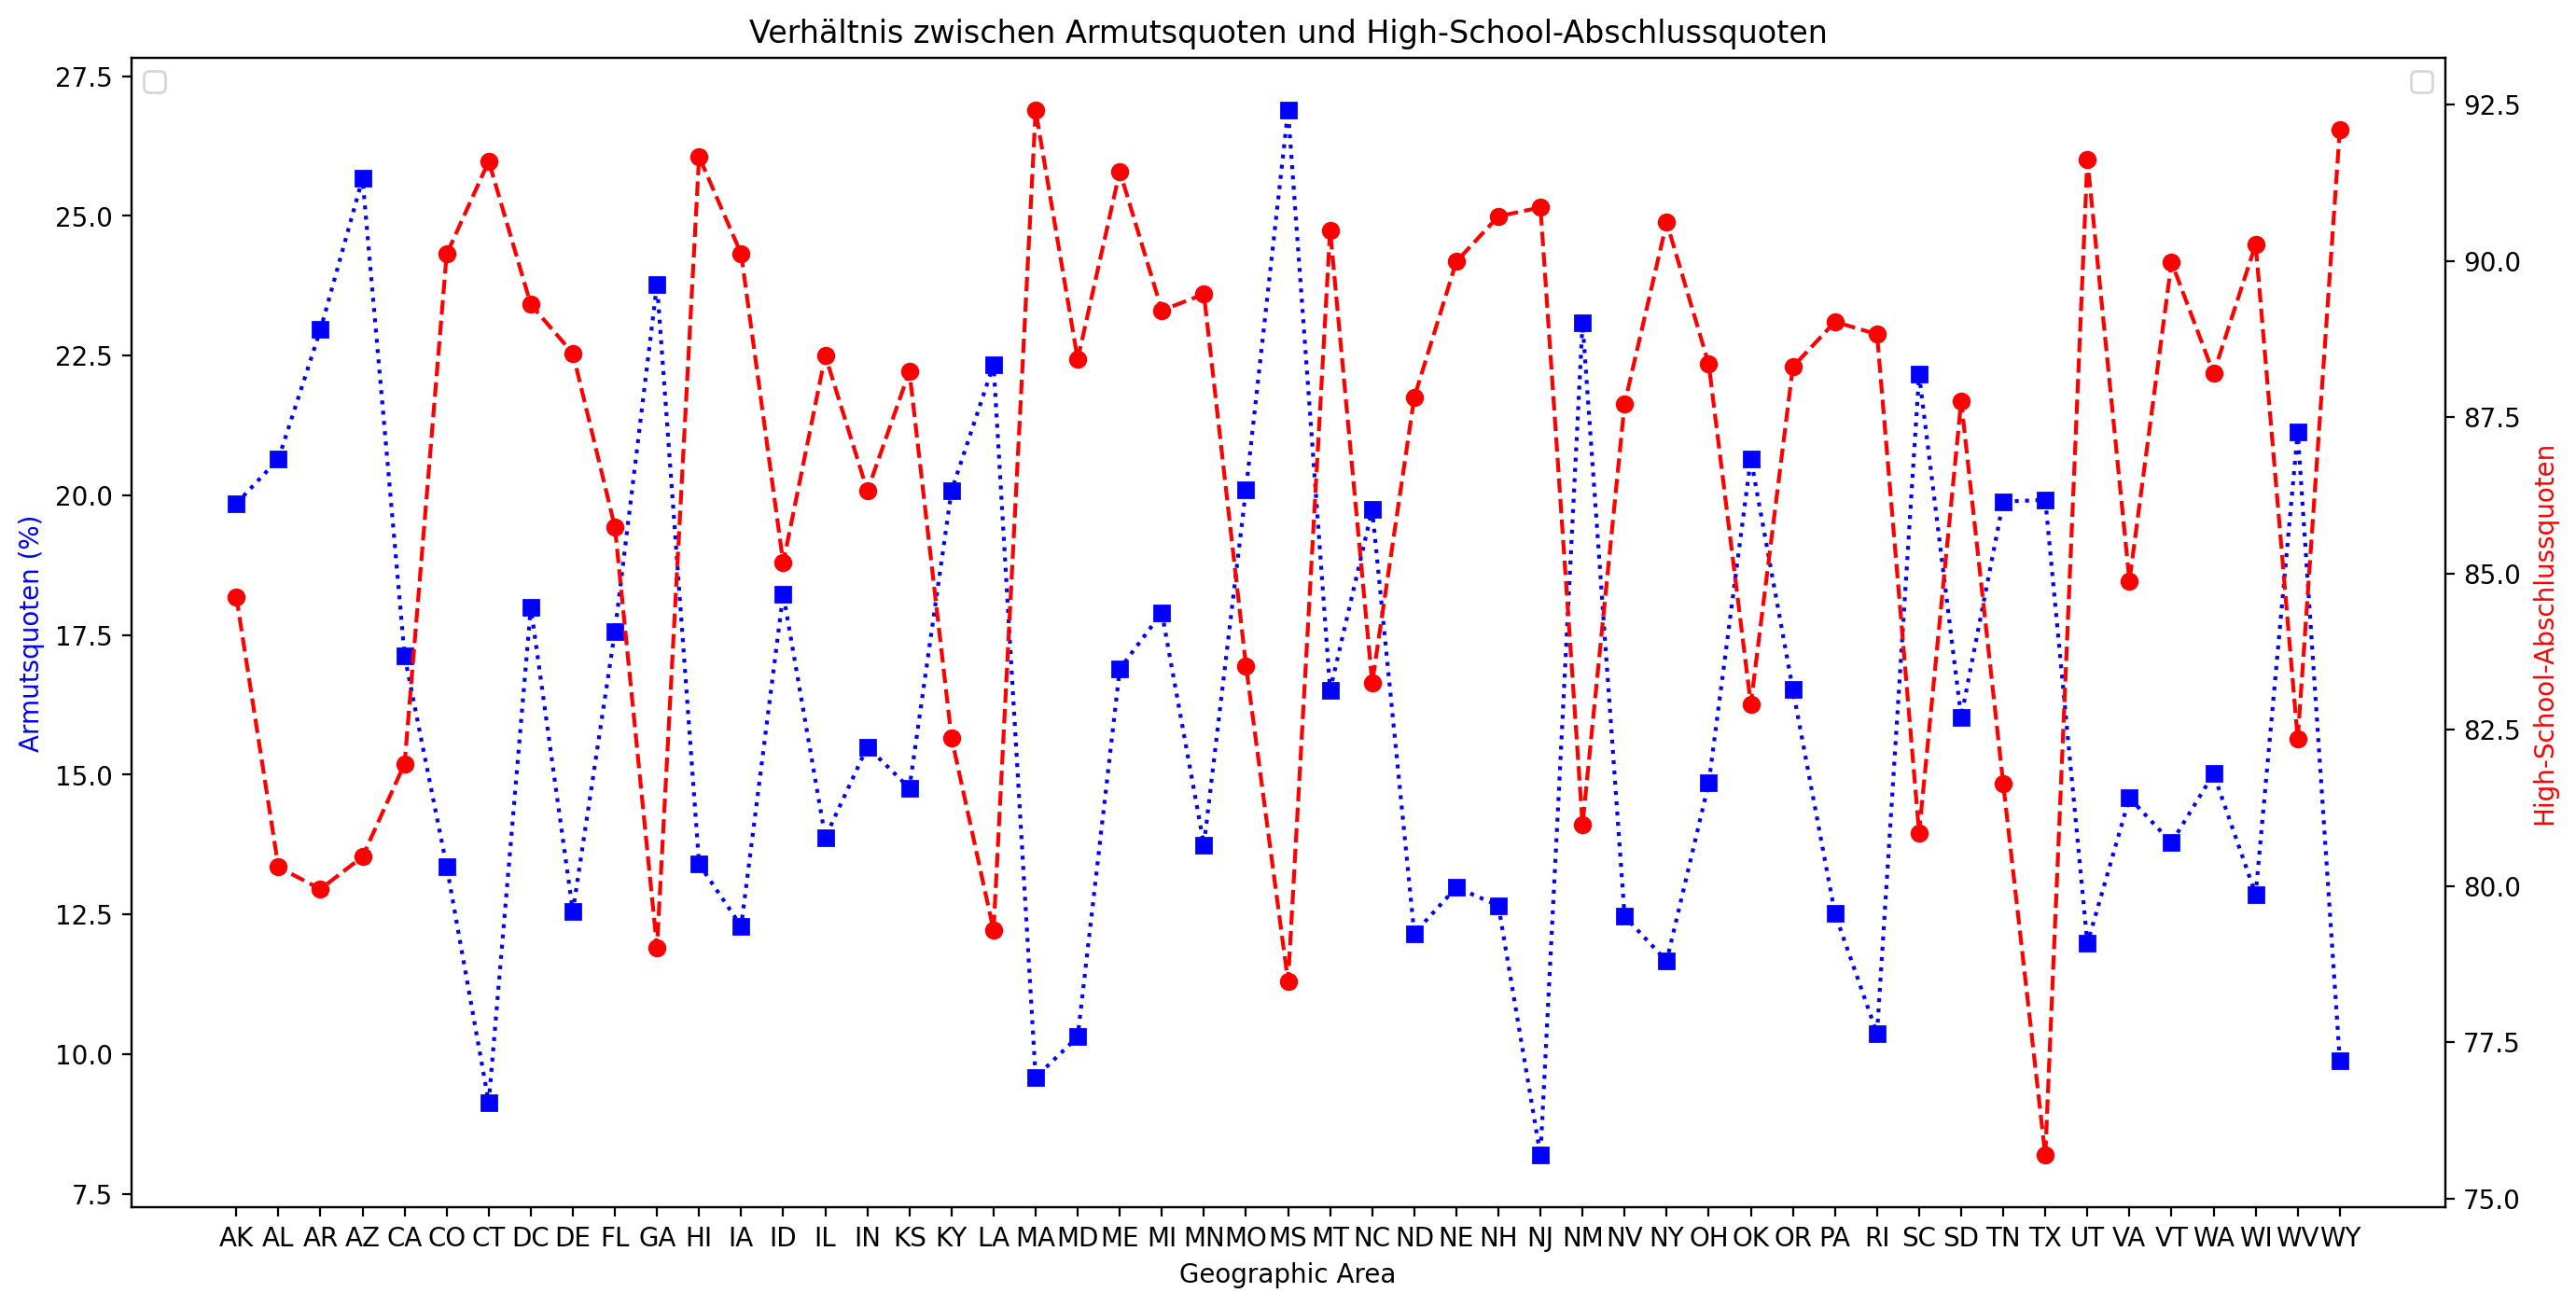

In [ ]:
hs_pov_comparison = pd.merge(states_compl_hs, pov_rate, on='Geographic Area')
hs_pov_comparison.head()

plt.figure(figsize=(16, 8), dpi=200)
plt.title('Verhältnis zwischen Armutsquoten und High-School-Abschlussquoten')

poverty_axis = plt.gca()
hs_axis = poverty_axis.twinx()

poverty_axis.set_xlabel('Geographic Area')
poverty_axis.set_ylabel('Armutsquoten (%)', color='blue')
hs_axis.set_ylabel('High-School-Abschlussquoten', color='red')

poverty_axis.plot(
    hs_pov_comparison['Geographic Area'],
    hs_pov_comparison.poverty_rate,
    color='blue',
    linestyle='dotted',
    marker='s'
)

hs_axis.plot(
    hs_pov_comparison['Geographic Area'],
    hs_pov_comparison.percent_completed_hs,
    color='red',
    linestyle='dashed',
    marker='o'

)

poverty_axis.grid(False)

poverty_axis.legend(loc='upper left')
hs_axis.legend(loc='upper right')

plt.show()


#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

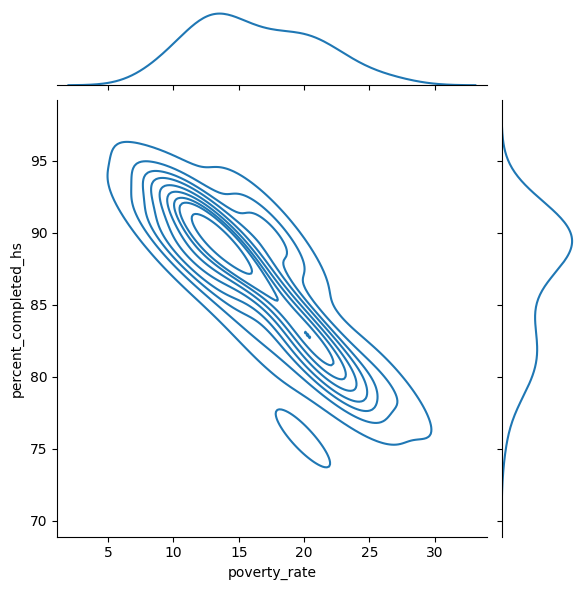

In [ ]:
pov_mean_by_state = df_pct_poverty.groupby(by=['Geographic Area'], as_index=False).poverty_rate.mean()
hs_mean_by_state = df_pct_completed_hs.groupby(by=['Geographic Area'], as_index=False).percent_completed_hs.mean()

hs_versus_pov = pd.merge(pov_mean_by_state, hs_mean_by_state, on='Geographic Area')


sns.jointplot(
    data=hs_versus_pov,
    x='poverty_rate',
    y='percent_completed_hs',
    kind='kde',

)

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio.

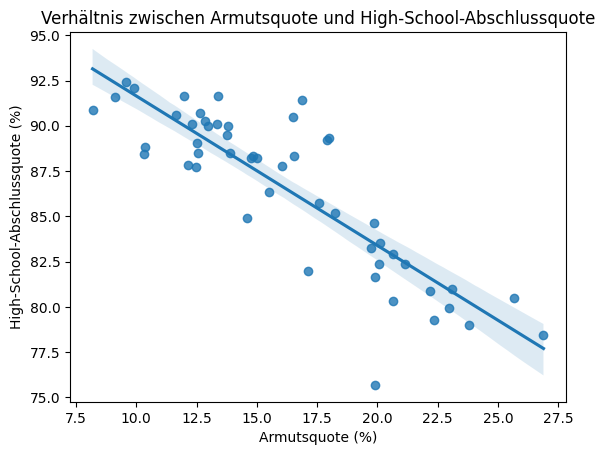

In [ ]:
sns.regplot(
     data=hs_versus_pov,
     x='poverty_rate',
     y='percent_completed_hs',

)

plt.title('Verhältnis zwischen Armutsquote und High-School-Abschlussquote')
plt.xlabel('Armutsquote (%)')
plt.ylabel('High-School-Abschlussquote (%)')

plt.show()

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections.

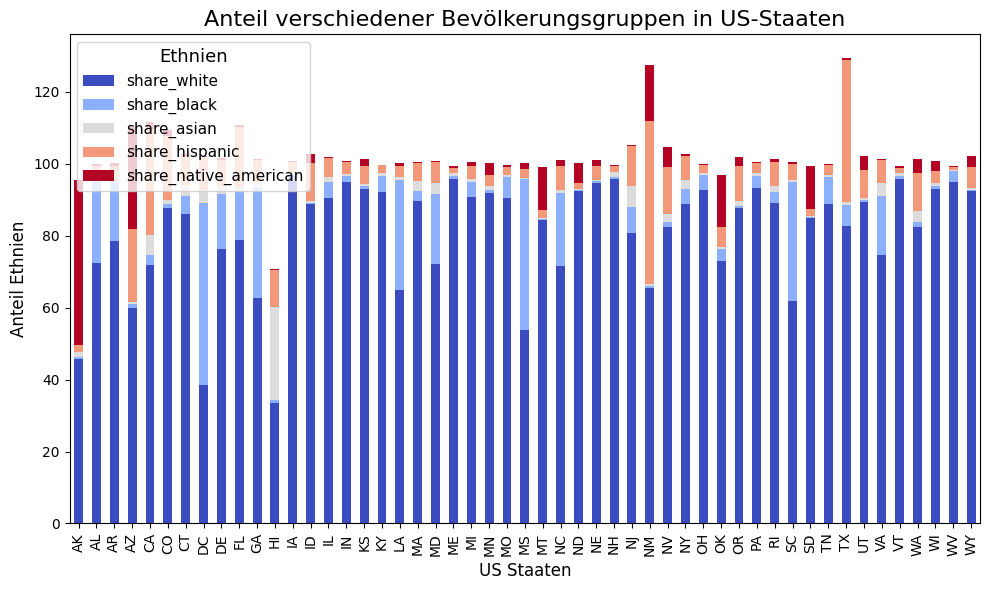

In [ ]:
df_share_race_city[['share_white', 'share_black', 'share_asian', 'share_hispanic', 'share_native_american']] = df_share_race_city[['share_white', 'share_black', 'share_asian', 'share_hispanic', 'share_native_american']].apply(pd.to_numeric, errors='coerce')


share_race_by_state = df_share_race_city.groupby('Geographic area')[['share_white', 'share_black', 'share_asian', 'share_hispanic', 'share_native_american']].mean()

share_race_by_state.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    colormap='coolwarm')

plt.title('Anteil verschiedener Bevölkerungsgruppen in US-Staaten', fontsize=16)
plt.xlabel('US Staaten', fontsize=12)
plt.ylabel('Anteil Ethnien', fontsize=12)


plt.legend(title='Ethnien', title_fontsize='13', fontsize='11', loc='upper left')


plt.tight_layout()
plt.show()




# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

In [ ]:
killed_by_race = df_fatalities['race'].value_counts()
killed_by_race.drop(0, inplace=True)

race_mapping = {
    'W': 'White',
    'B': 'Black',
    'H': 'Hispanic',
    'A': 'Asian',
    'N': 'Native American',
    'O': 'Other'
}

killed_by_race.index = killed_by_race.index.map(race_mapping)


px.pie(
    killed_by_race,
    values='count',
    names=killed_by_race.index,
    title='Tötungen nach Ethnie',
    hole=0.5,
)




# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women.

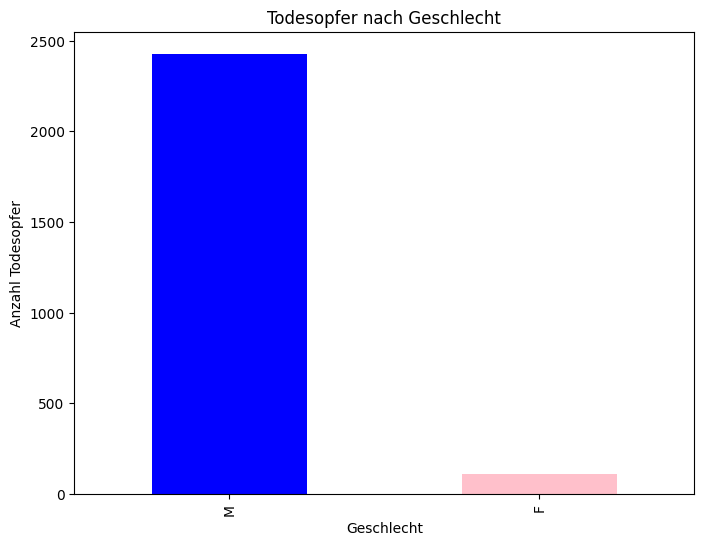

In [ ]:
deaths_by_gender = df_fatalities['gender'].value_counts()

deaths_by_gender.plot(
    kind='bar',
    figsize=(8, 6),
    color=['blue', 'pink'])


plt.title('Todesopfer nach Geschlecht')
plt.xlabel('Geschlecht')
plt.ylabel('Anzahl Todesopfer')

#plt.tight_layout()
plt.show()

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death?

In [ ]:
px.box(
    df_fatalities[df_fatalities['gender']=='M'],
    x='manner_of_death',
    y='age',
    color='manner_of_death',
    title = 'Alter und Todesart Maenner'
)




In [ ]:
px.box(
    df_fatalities[df_fatalities['gender']=='F'],
    x='manner_of_death',
    y='age',
    color='manner_of_death',
    title = 'Alter und Todesart Frauen',
)




# Were People Armed?

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed?

Die Opfer waren zu 93.25 % bewaffnet


<Axes: title={'center': 'Top 10 Waffen der Opfer'}, xlabel='Bewaffnet', ylabel='Anzahl je Waffe'>

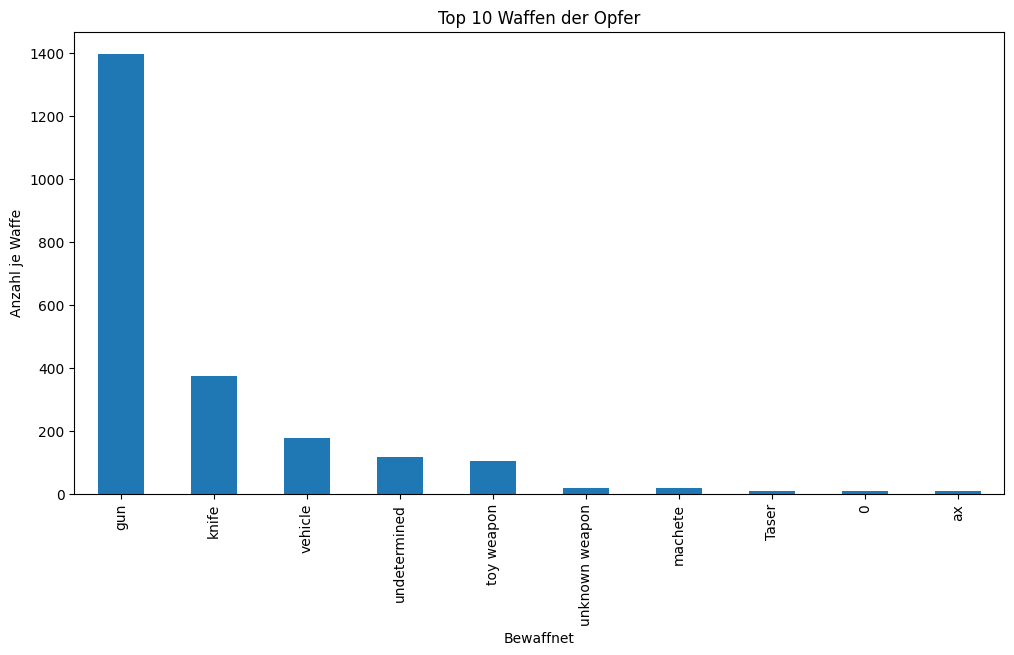

In [ ]:
armed_victims = df_fatalities[df_fatalities['armed'] != 'unarmed']['armed']
unarmed_victims = df_fatalities[df_fatalities['armed'] == 'unarmed']

share_armed_victims = (len(armed_victims) / (len(armed_victims) + len(unarmed_victims))) * 100

print(f"Die Opfer waren zu {share_armed_victims:.4} % bewaffnet")

armed_victims.value_counts()[:10].plot(
    kind='bar',
    figsize=(12, 6),
    title = 'Top 10 Waffen der Opfer',
    xlabel='Bewaffnet',
    ylabel='Anzahl je Waffe'

)



# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [ ]:
total_victims = len(df_fatalities)
victims_under_25 = len(df_fatalities[df_fatalities['age'] < 25])
percentage_under_25 = (victims_under_25 / total_victims) * 100

print(f"Percentage of victims under 25: {percentage_under_25:.2f}%")

Percentage of victims under 25: 20.79%


Create a histogram and KDE plot that shows the distribution of ages of the people killed by police.

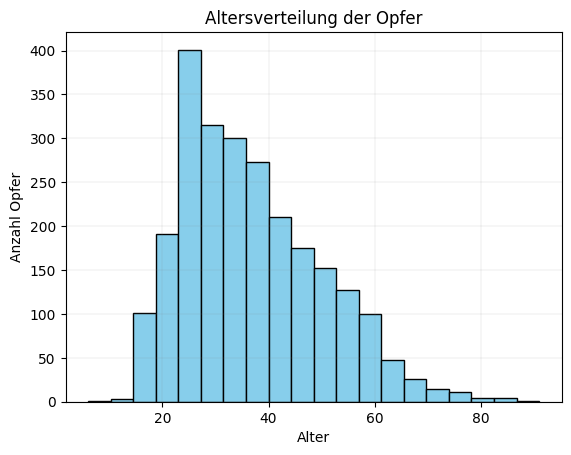

In [ ]:
# DataFrame um 0 als Alter bereinigt
df_clean_age = df_fatalities[df_fatalities['age'] != 0]

plt.hist(
    df_clean_age['age'],
    bins=20,
    color='skyblue',
    edgecolor='black')

plt.grid(True, which='both', linewidth=0.1, color='gray')

plt.title('Altersverteilung der Opfer')
plt.xlabel('Alter')
plt.ylabel('Anzahl Opfer')

plt.show()

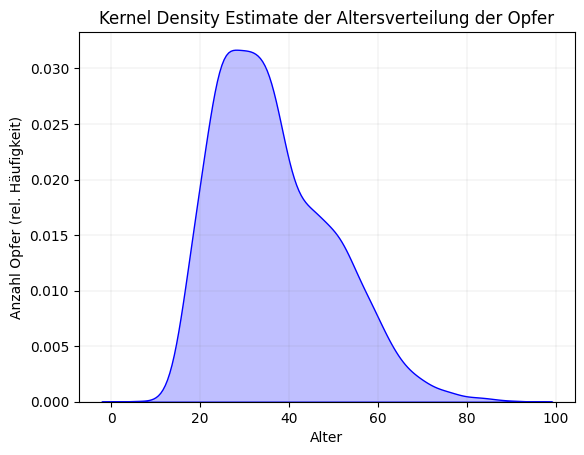

In [ ]:
# KDE Plot
plt.title("Kernel Density Estimate der Altersverteilung der Opfer")

sns.kdeplot(
    df_clean_age['age'],
    fill=True,
    color='blue'
)

plt.grid(True, which='both', linewidth=0.1, color='gray')

plt.xlabel('Alter')
plt.ylabel('Anzahl Opfer (rel. Häufigkeit)')

plt.show()


Create a seperate KDE plot for each race. Is there a difference between the distributions?

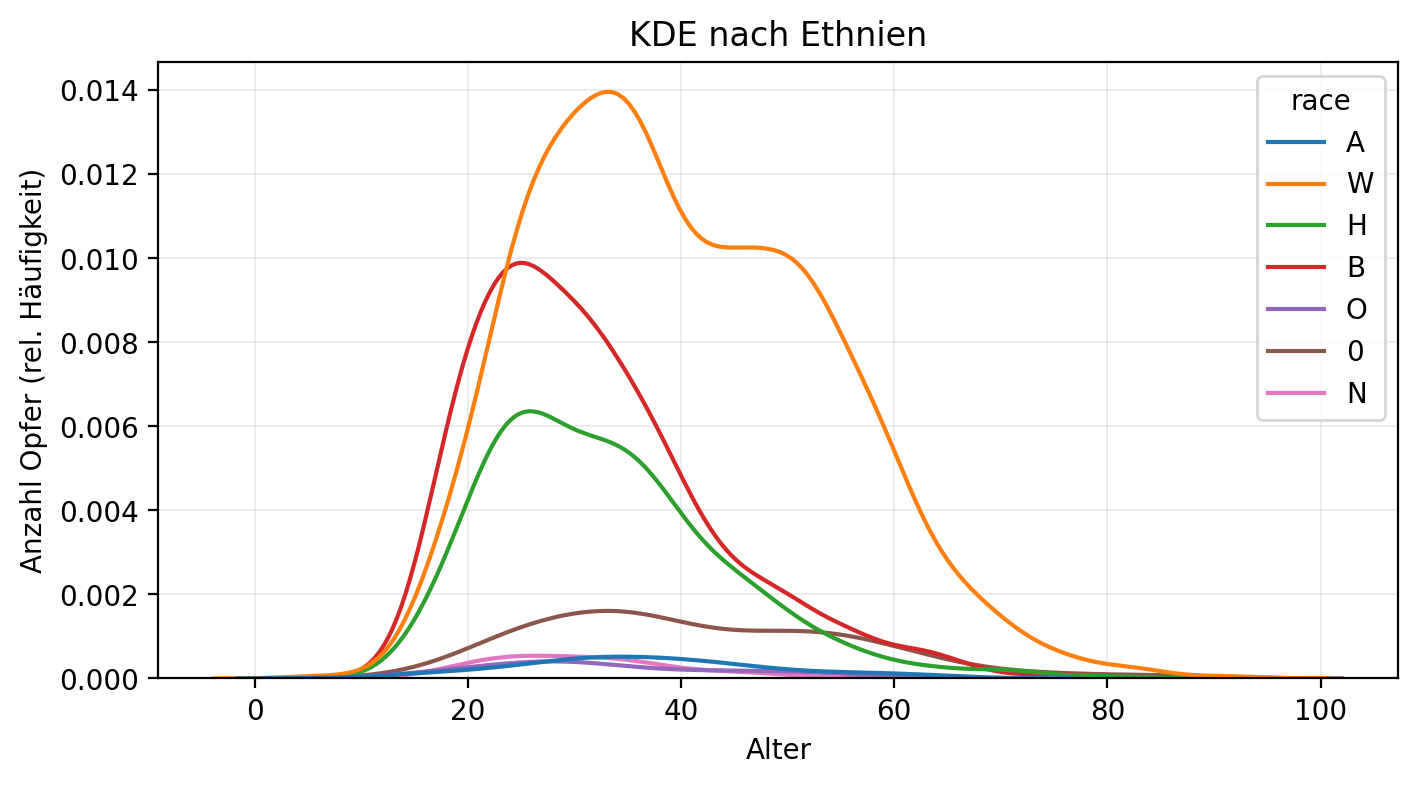

In [ ]:
plt.figure(figsize=(8, 4), dpi=200)
plt.title('KDE nach Ethnien')

sns.kdeplot(
    df_clean_age,
    x='age',
    hue='race',
)

plt.grid(True, which='both', linewidth=0.1, color='gray')
plt.xlabel('Alter')
plt.ylabel('Anzahl Opfer (rel. Häufigkeit)')


plt.show()

# Race of People Killed

Create a chart that shows the total number of people killed by race.

In [ ]:
deaths_total_race = df_fatalities.groupby(by=['race']).size().reset_index(name='count').drop([0]).sort_values('count', ascending=False)

fig = px.bar(
    deaths_total_race.replace({'W': 'White', 'B': 'Black', 'H': 'Hispanic', 'A': 'Asian', 'N': 'Native American', 'O': 'Other'}),
    x='race',
    y='count',
    color='count'

)

fig.update_traces(showlegend=False)

fig.update_layout(
    xaxis_title='Ethnische Gruppe',
    yaxis_title='Anzahl Tote pro Ethnie',

)



fig.show()


# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [ ]:
df_fatalities['signs_of_mental_illness'].value_counts(normalize=True) * 100


,proportion
signs_of_mental_illness,
False,75.03
True,24.97


# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

In [ ]:
top_10_cities = df_fatalities['city'].value_counts().sort_values(ascending=False)[:10]

fig = px.bar(
    top_10_cities,
    y='count',

)

fig.update_layout(
    yaxis_title='Anzahl Tötungen',
    xaxis_title='Städte',
)

fig.show()

# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city.

<Axes: title={'center': 'Rate of Death by Race on Top 10 Cities'}, xlabel='city'>

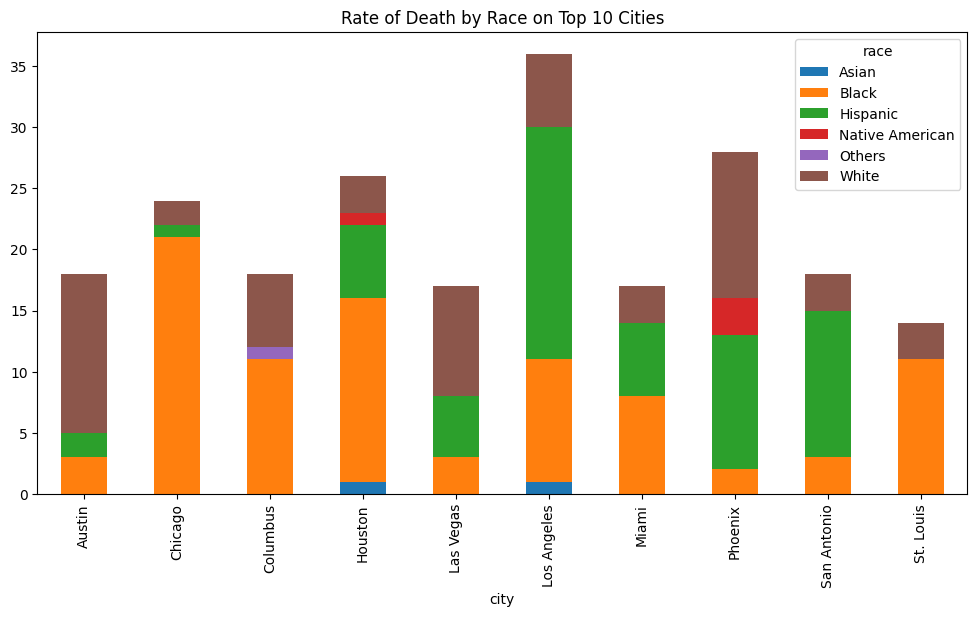

In [ ]:
top_10_cities_by_race = df_fatalities[df_fatalities['city'].isin(top_10_cities.index.tolist())].groupby(['city','race'])['name'].count().unstack(level=1)
top_10_cities_by_race.fillna(0, inplace=True)
top_10_cities_by_race.drop(0, axis=1, inplace=True)
top_10_cities_by_race.rename({'W':'White','B':'Black','H':'Hispanic','A':'Asian','N':'Native American','O':'Others'},axis=1, inplace=True)

top_10_cities_by_race.plot(
    kind='bar',
    stacked=True,
    figsize=(12,6),
    title='Rate of Death by Race on Top 10 Cities',

)

# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty?

In [ ]:
deaths_by_state = df_fatalities['state'].value_counts().sort_index()


px.choropleth(
    data_frame = deaths_by_state,
    locations = deaths_by_state.index,
    color = deaths_by_state.values,
    color_continuous_scale='Reds',
    locationmode="USA-states",
    scope='usa',
    title = 'Opfer nach US-Bundesstaat'
)




# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data?

In [ ]:
df_fatalities['date'] = pd.to_datetime(df_fatalities['date'])
df_monthly = df_fatalities.groupby(df_fatalities['date'].dt.to_period('M')).size().reset_index(name='counts')

df_monthly['date'] = df_monthly['date'].dt.to_timestamp()

fig = px.line(
    df_monthly,
    x='date',
    y='counts',
    title='Tötungen durch die Polizei im Zeitverlauf (monatlich)',
    labels={'date': 'Monat', 'counts': 'Anzahl Opfer'}
)

fig.show()


<ipython-input-62-a292bf37304b>:1: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).